# Resonance frequency plots

In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

import pickle

import galpy.potential as potential
from galpy.orbit import Orbit

//anaconda/envs/galpy/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



In [2]:
def integrate_orbits(sp, R, z):
    phi = 0
    amp = 2
    nvRs, nvTs = 50, 50
    vRs = np.linspace(-0.5, 0.5, nvRs)
    vTs = np.linspace(0.5, 1.5, nvTs)
    vz = 0.07

    ts = np.linspace(0, 60, 1000)

    # MWPotential2014 only
    mp_rperis = np.empty((nvRs, nvTs))  # pericenter radii
    mp_rapos = np.empty((nvRs, nvTs))  # apocenter radii
    mp_es = np.empty((nvRs, nvTs))  # eccentricities
    mp_zmaxs = np.empty((nvRs, nvTs))  # zmax

    # MWPotential2014 + SpiralArmsPotential
    sp_rperis = np.empty((nvRs, nvTs))  # pericenter radii
    sp_rapos = np.empty((nvRs, nvTs))  # apocenter radii
    sp_es = np.empty((nvRs, nvTs))  # eccentricities
    sp_zmaxs = np.empty((nvRs, nvTs))  # zmax

    for ii in range(nvRs):
        for jj in range(nvTs):
            o = Orbit(vxvv=[R, vRs[ii], vTs[jj], z, vz, phi])
            o.integrate(ts, potential.MWPotential2014, method='symplec4_c')
            mp_rperis[ii, jj] = o.rperi()
            mp_rapos[ii, jj] = o.rap()
            mp_es[ii, jj] = o.e()
            mp_zmaxs[ii, jj] = o.zmax()

            o.integrate(ts, sp, method='symplec4_c')
            sp_rperis[ii, jj] = o.rperi()
            sp_rapos[ii, jj] = o.rap()
            sp_es[ii, jj] = o.e()
            sp_zmaxs[ii, jj] = o.zmax()
            
    return mp_rperis, mp_rapos, mp_es, mp_zmaxs, sp_rperis, sp_rapos, sp_es, sp_zmaxs, omega

In [3]:
def plot_orbit_int_results(mp_rperis, mp_rapos, mp_es, mp_zmaxs, sp_rperis, sp_rapos, sp_es, sp_zmaxs, omega):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_rperis.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax1.set_title('Pericenter radii for MWPotential2014 \n omega={:.2f}'.format(omega), fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_rperis.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax2.set_title('Pericenter radii for SpiralArmsPotential + MWPotential2014 \n omega={:.2f}'.format(omega), fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_rapos.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax1.set_title('Apocenter radii for MWPotential2014\n omega={:.2f}'.format(omega), fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_rapos.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax2.set_title('Apocenter radii for SpiralArmsPotential + MWPotential2014\n omega={:.2f}'.format(omega), fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_es.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax1.set_title('Eccentricities for MWPotential2014\n omega={:.2f}'.format(omega), fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_es.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax2.set_title('Eccentricities for SpiralArmsPotential + MWPotential2014\n omega={:.2f}'.format(omega), fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
    im1 = ax1.imshow(mp_zmaxs.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax1.set_title('z max for MWPotential2014\n omega={:.2f}'.format(omega), fontsize=14)
    ax1.set_xlabel('$v_R$', fontsize=14)
    ax1.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)  # magic: https://stackoverflow.com/questions/16702479/matplotlib-colorbar-placement-and-size
    im2 = ax2.imshow(sp_zmaxs.T, extent=[-0.5, 0.5, 0.5, 1.5], origin='lower', cmap='viridis')
    ax2.set_title('z max for SpiralArmsPotential + MWPotential2014\n omega={:.2f}'.format(omega), fontsize=14)
    ax2.set_xlabel('$v_R$', fontsize=14)
    ax2.set_ylabel('$v_T$', fontsize=14)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.tight_layout()

In [4]:
def pickle_data(filename, data):
    output = open(filename, 'wb')
    pickle.dump(data, output)
    output.close()

In [5]:
potential.lindbladR(potential.MWPotential2014, 5./3.,m='corotation')

0.6149960656172498

# Corotation

# At resonance with omega=5/3

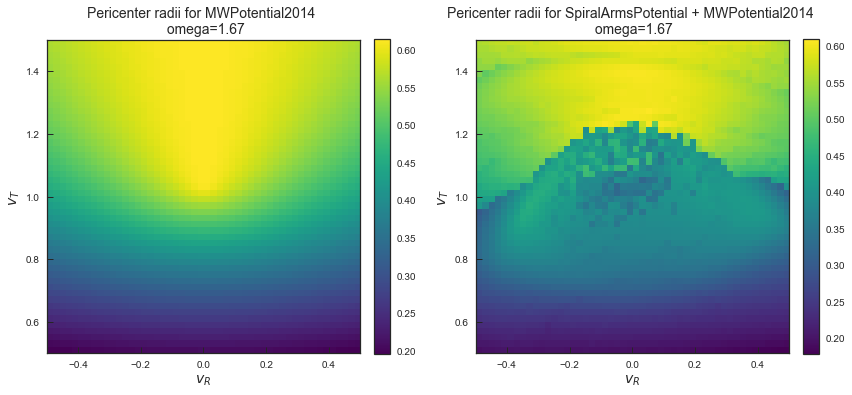

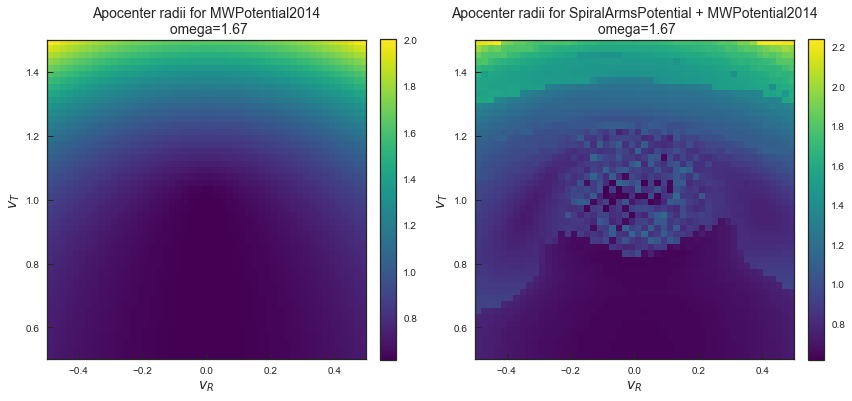

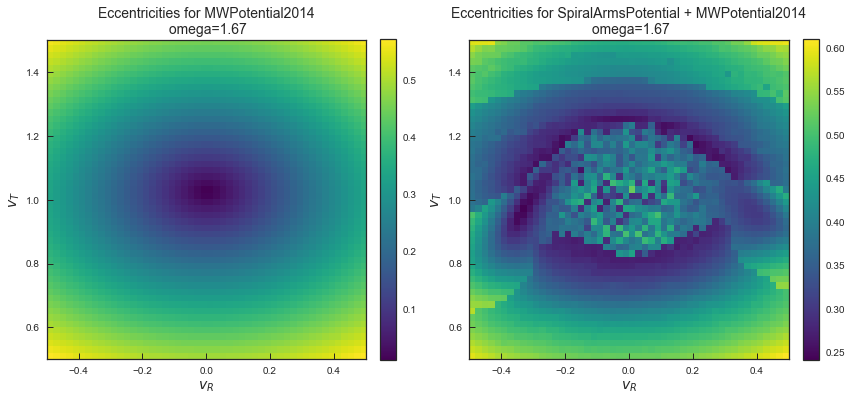

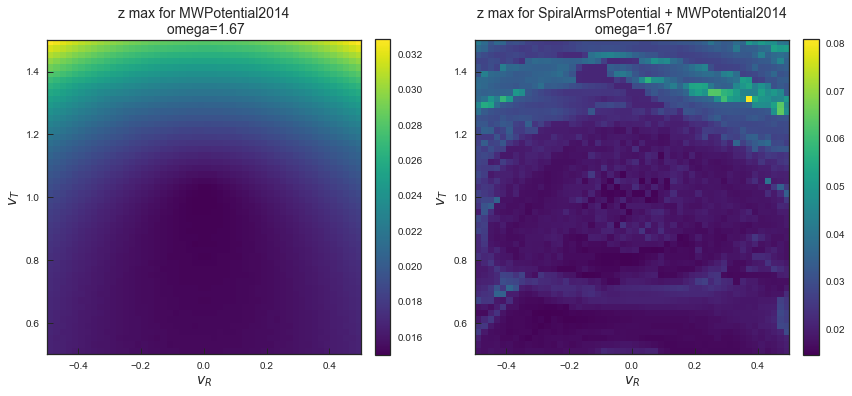

In [6]:
omega=5./3.
sp = [potential.SpiralArmsPotential(N=2, amp=2, omega=omega)] + potential.MWPotential2014
data = integrate_orbits(sp, potential.lindbladR(potential.MWPotential2014, omega, m='corotation'), 0)
pickle_data('./pickles/orb_int_data_resonance_omega_5_3.pkl', data)
plot_orbit_int_results(*data)
plt.show()

# Not at resonance frequency

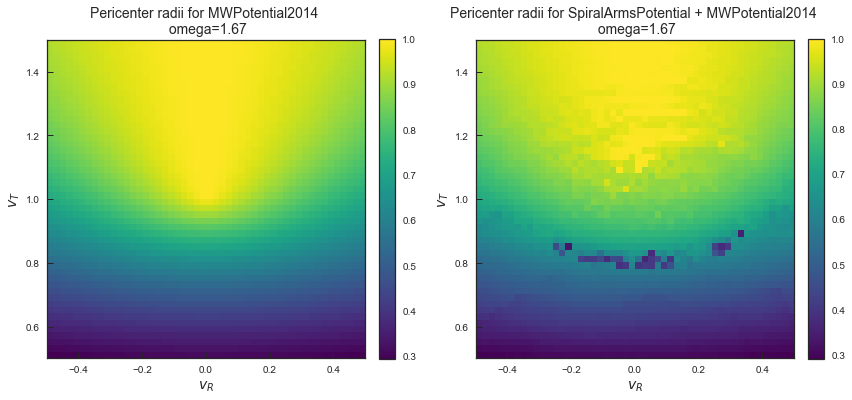

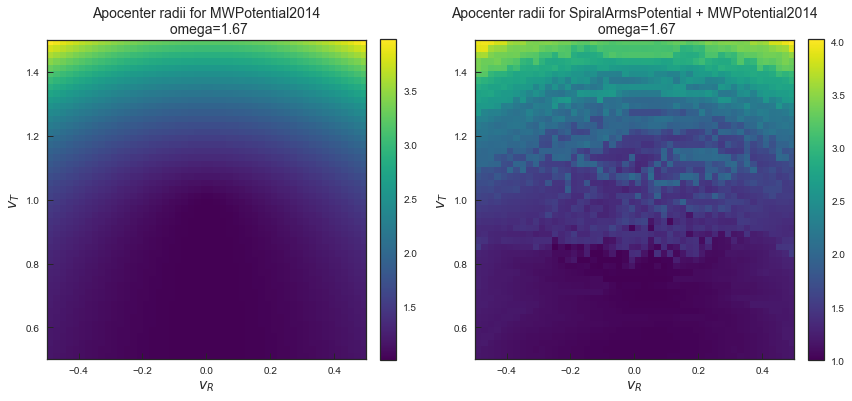

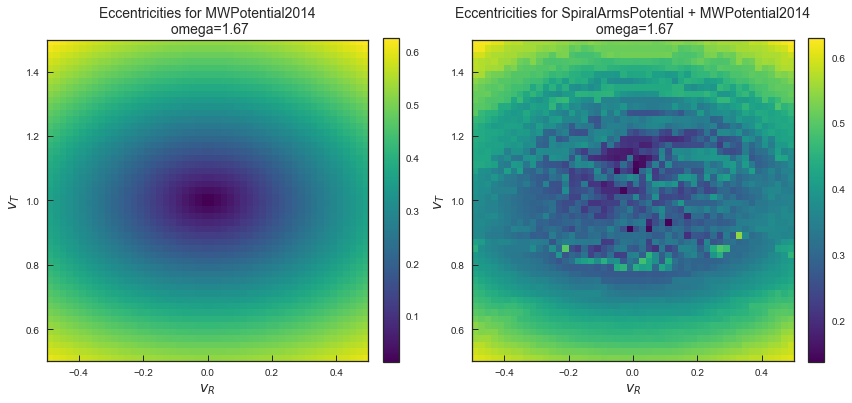

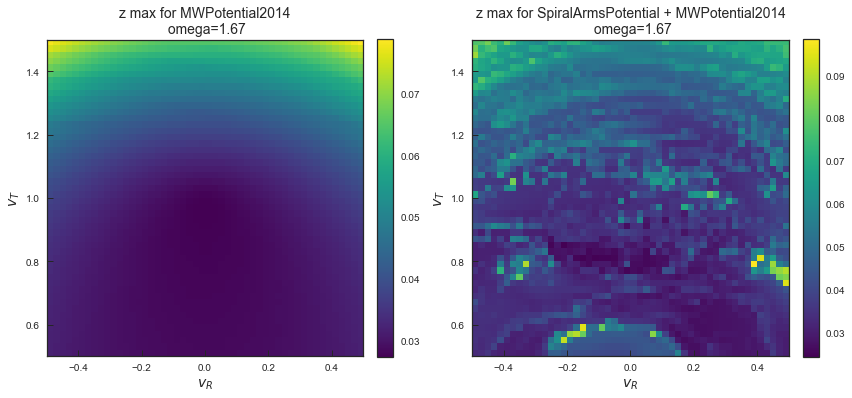

In [7]:
omega=5./3.
sp = [potential.SpiralArmsPotential(N=2, amp=2, omega=omega)] +  potential.MWPotential2014
data = integrate_orbits(sp, 1, 0)
pickle_data('./pickles/orb_int_data_not_resonance.pkl', data)
plot_orbit_int_results(*data)
plt.show()

# At z = 0.1

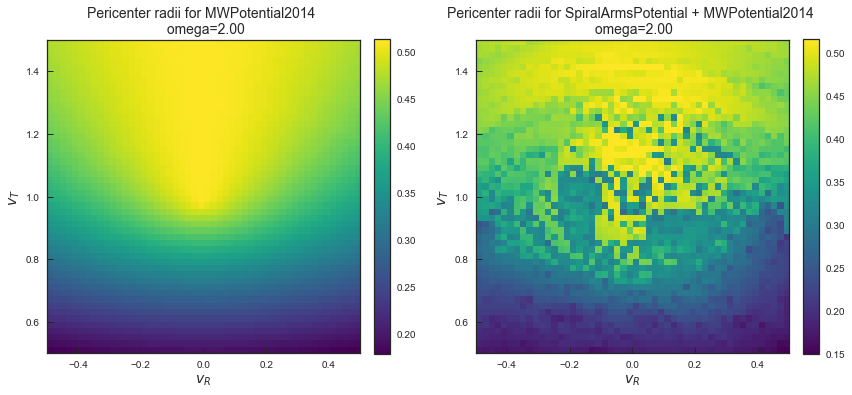

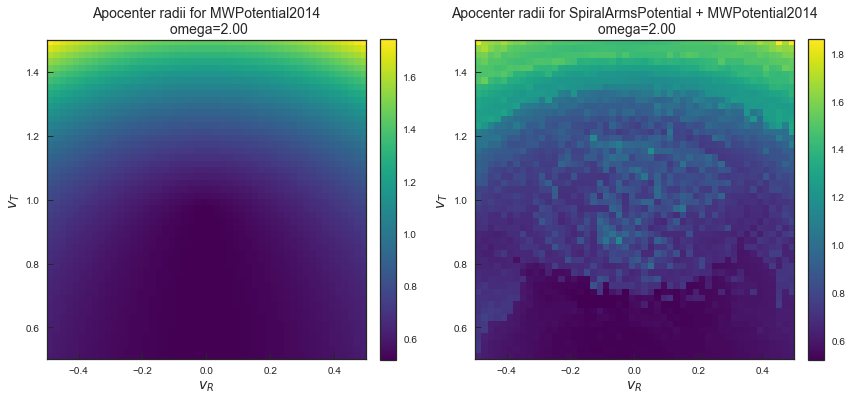

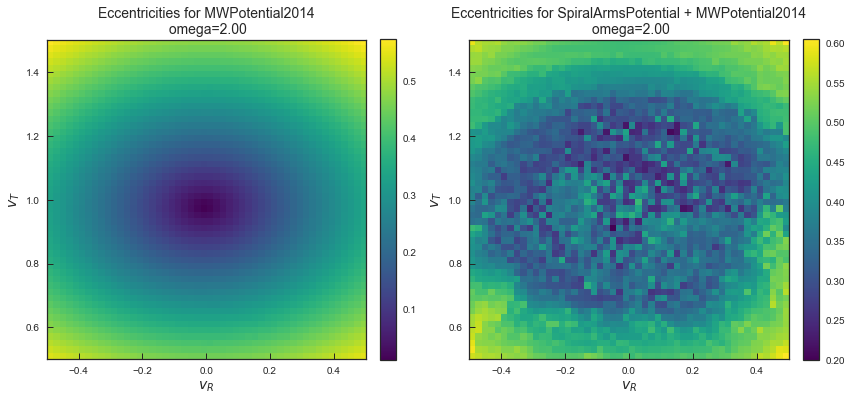

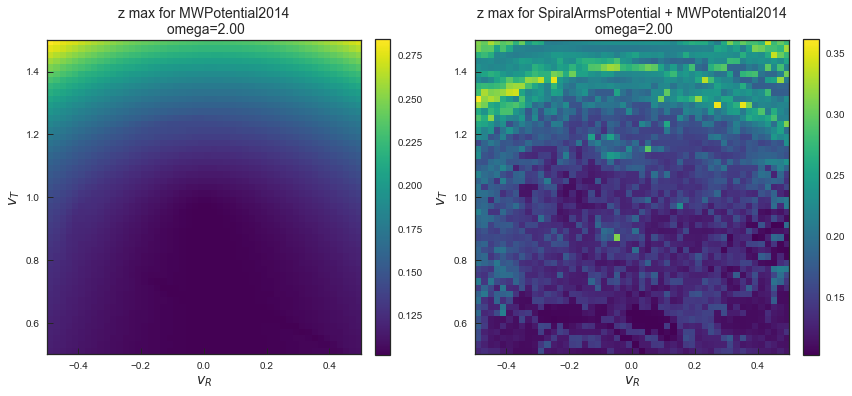

In [8]:
# At z = 0.1
omega=2
sp = [potential.SpiralArmsPotential(N=2, amp=2, omega=omega)] + potential.MWPotential2014
data = integrate_orbits(sp, potential.lindbladR(potential.MWPotential2014, omega, m='corotation'), 0.1)
pickle_data('./pickles/orb_int_data_resonance_z_0_1.pkl', data)
plot_orbit_int_results(*data)
plt.show()

# At resonance with omega=2

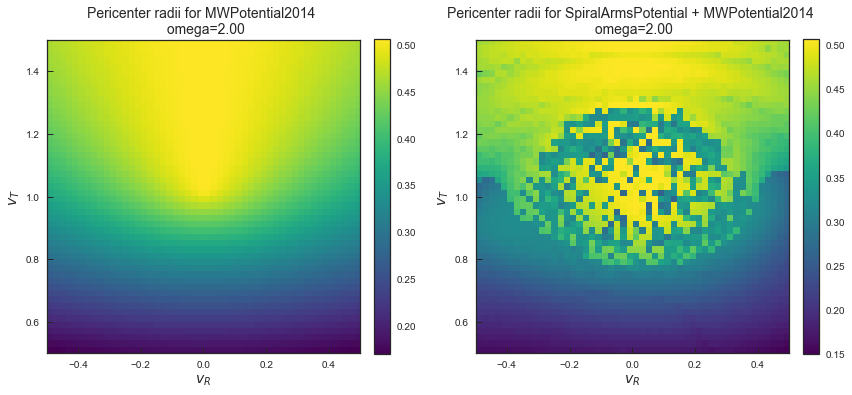

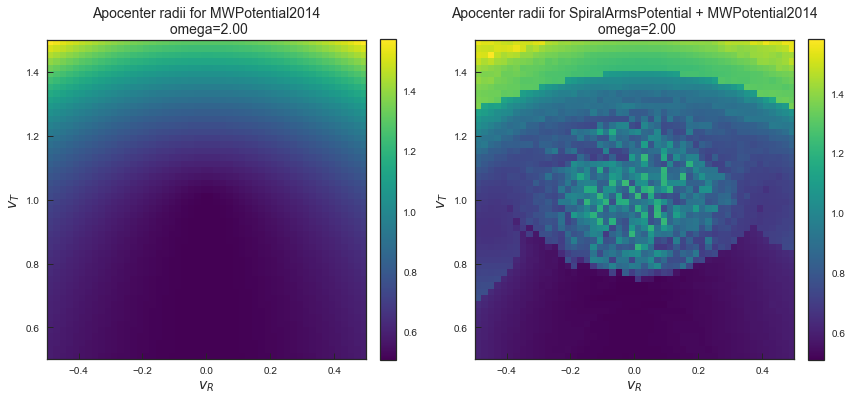

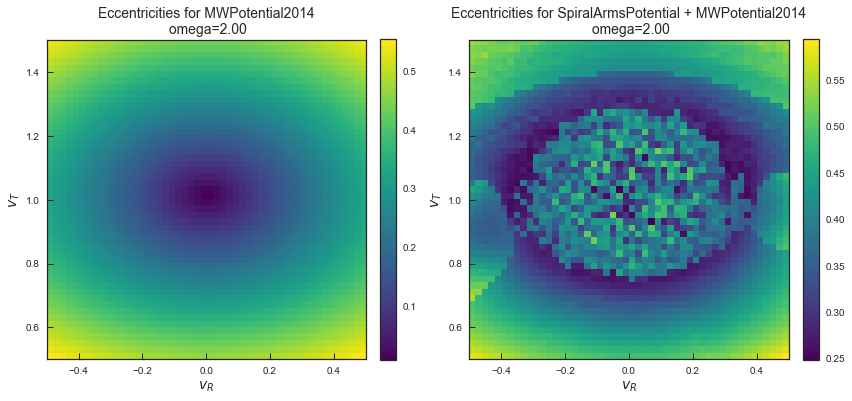

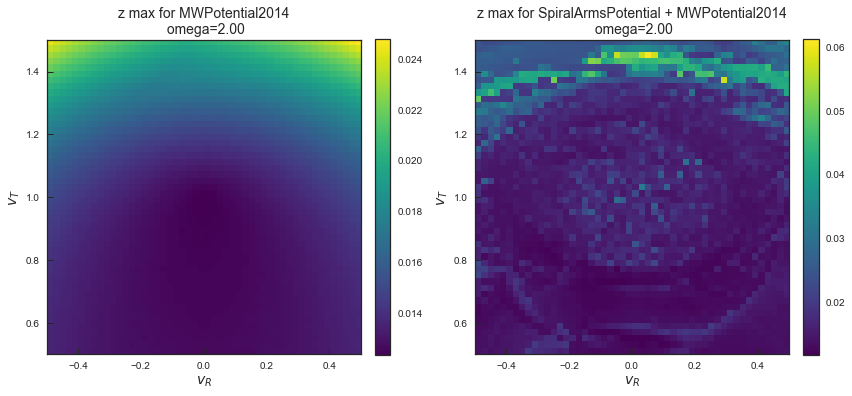

In [9]:
omega=2
sp = [potential.SpiralArmsPotential(N=2, amp=2, omega=omega)] + potential.MWPotential2014
data = integrate_orbits(sp, potential.lindbladR(potential.MWPotential2014, omega, m='corotation'), 0)
pickle_data('./pickles/orb_int_data_resonance_omega_2.pkl', data)
plot_orbit_int_results(*data)
plt.show()

# At resonance, with omega=5

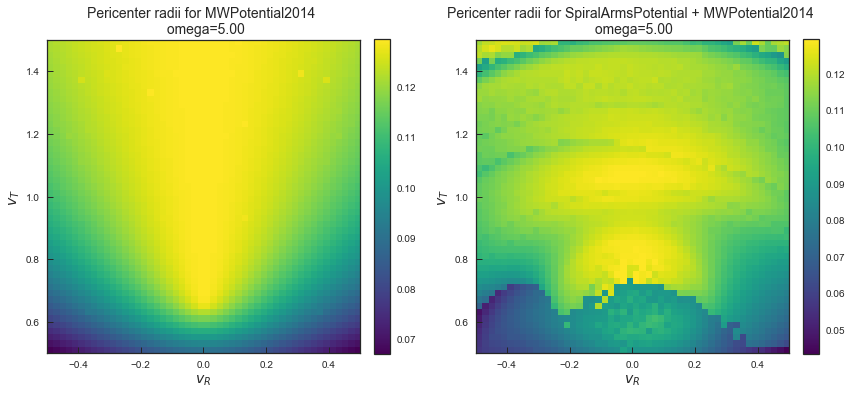

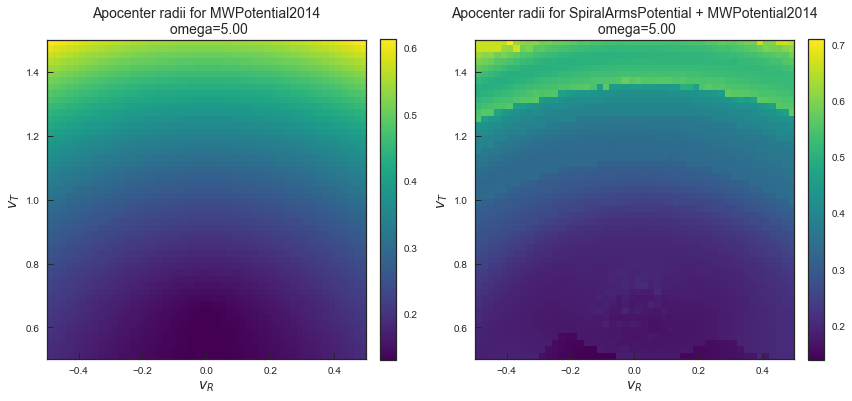

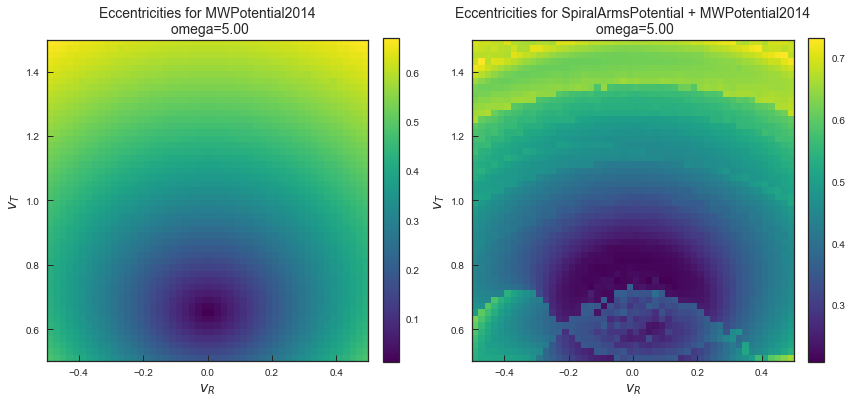

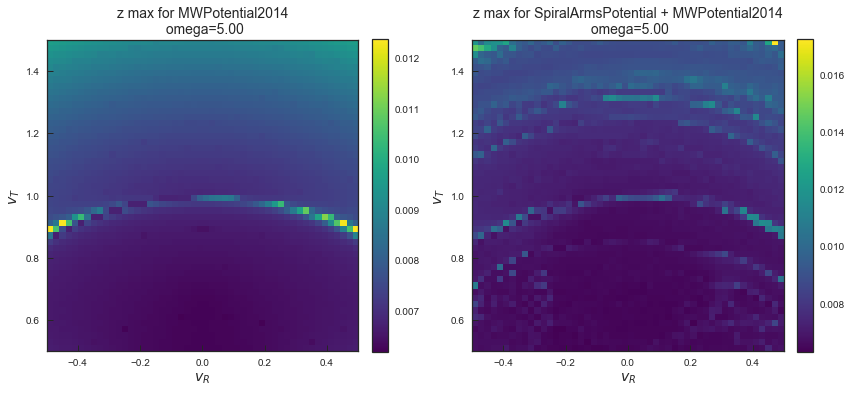

In [10]:
omega=5
sp = [potential.SpiralArmsPotential(N=2, amp=2, omega=omega)] + potential.MWPotential2014
data = integrate_orbits(sp, potential.lindbladR(potential.MWPotential2014, omega, m='corotation'), 0)
pickle_data('./pickles/orb_int_data_resonance_omega_5.pkl', data)
plot_orbit_int_results(*data)
plt.show()

0.0198186887137
0.455324975329
0.659470776746
//anaconda/envs/galpy/lib/python2.7/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))



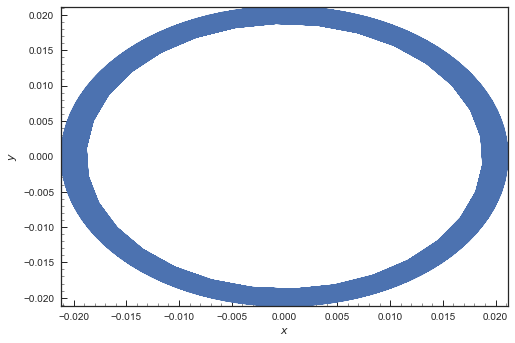

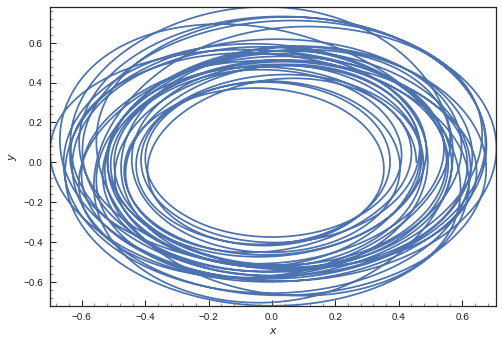

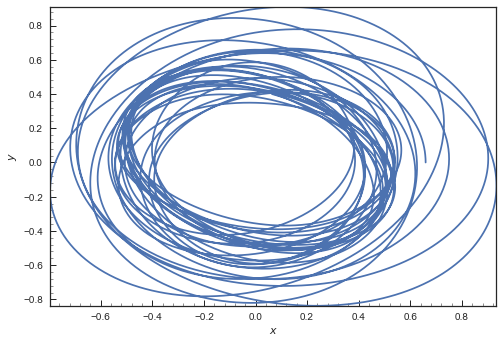

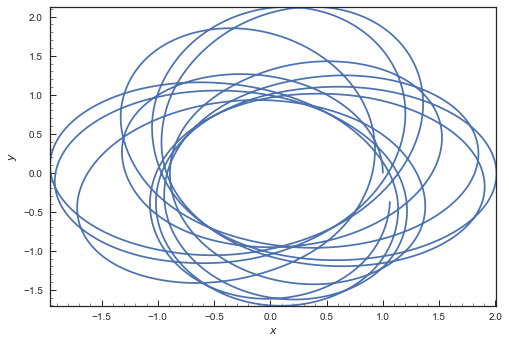

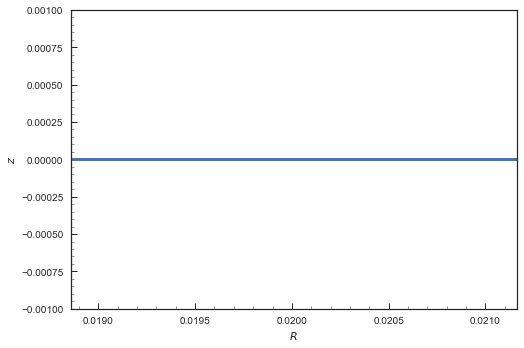

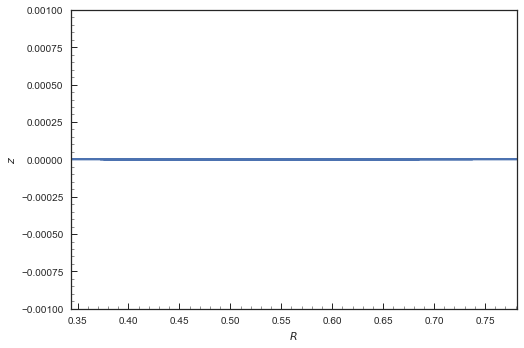

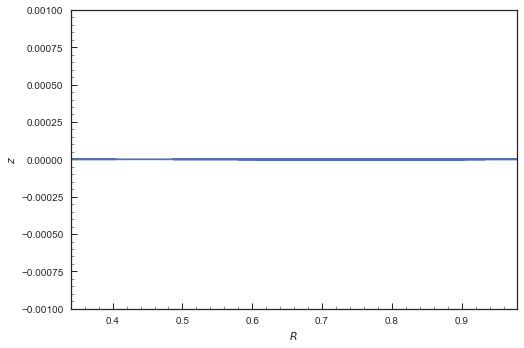

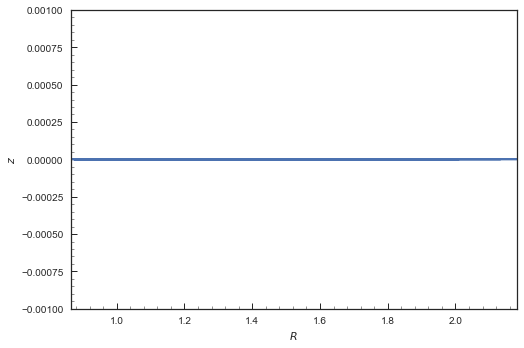

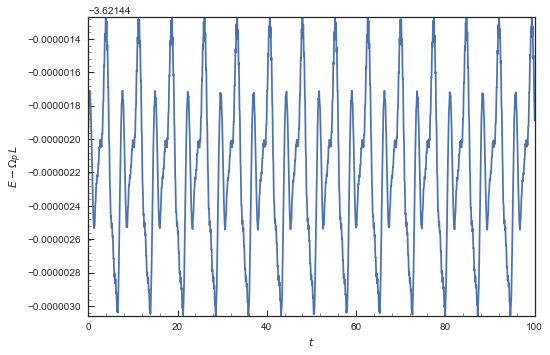

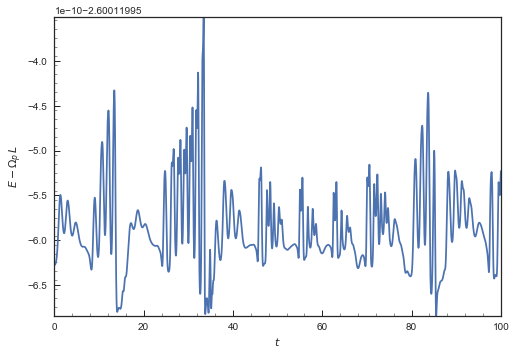

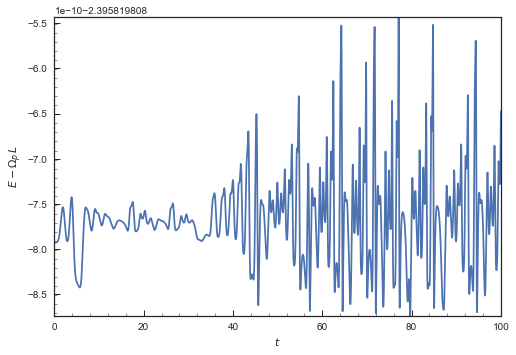

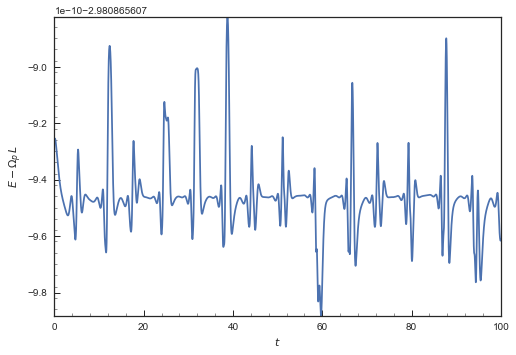

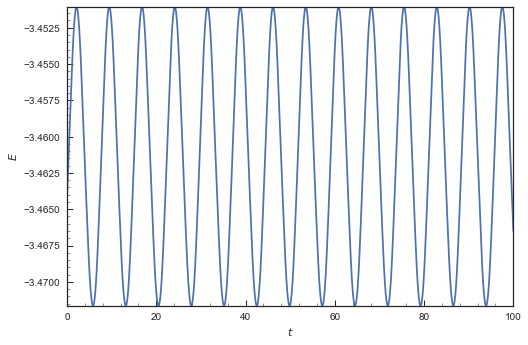

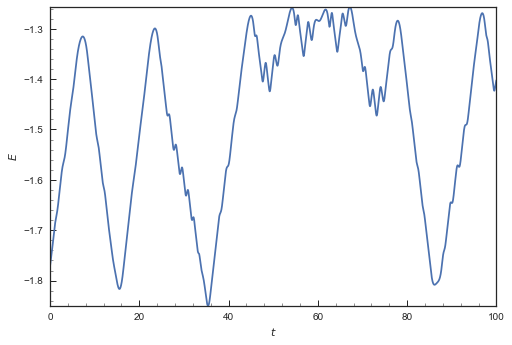

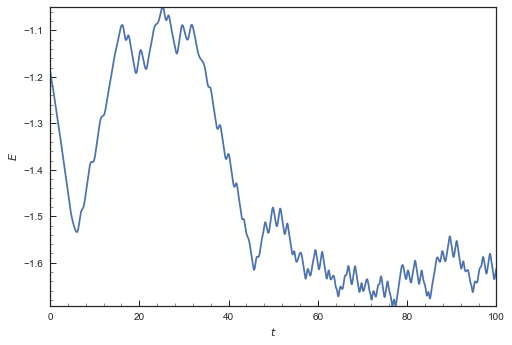

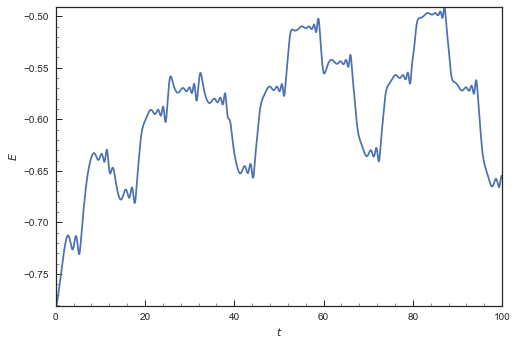

In [11]:
sp1 = [potential.SpiralArmsPotential(amp=2, omega=20, Cs=[8/3/np.pi, 0.5, 8/15/np.pi])] + potential.MWPotential2014
sp2 = [potential.SpiralArmsPotential(amp=2, omega=2, Cs=[8/3/np.pi, 0.5, 8/15/np.pi])] + potential.MWPotential2014
sp3 = [potential.SpiralArmsPotential(amp=2, omega=5/3)] + potential.MWPotential2014
sp4 = [potential.SpiralArmsPotential(amp=2, omega=2)] + potential.MWPotential2014

#o = Orbit(vxvv=[R, vR, vT, z, vz, phi])

R = potential.lindbladR(sp1, 20, m='corotation')
print R
o1 = Orbit(vxvv=[R, 0, potential.vcirc(sp1, R, 0), 0, 0, 0])

R = potential.lindbladR(sp2, 2, m='corotation')
print R
o2 = Orbit(vxvv=[R, 0, potential.vcirc(sp2, R, 0), 0, 0, 0])
                           
R = potential.lindbladR(sp3, 5/3, m='corotation')
print R
o3 = Orbit(vxvv=[R, 0, potential.vcirc(sp3, R, 0), 0, 0, 0])

o4 = Orbit(vxvv=[1., 0, 1.1, 0., 0., 0.])

ts = np.linspace(0,100,10000)
o1.integrate(ts, sp1, method='symplec4_c')
o2.integrate(ts, sp2, method='symplec4_c')
o3.integrate(ts, sp3, method='symplec4_c')
o4.integrate(ts, sp4, method='symplec4_c')

o1.plot(d1='x', d2='y')
o2.plot(d1='x', d2='y')
o3.plot(d1='x', d2='y')
o4.plot(d1='x', d2='y')

o1.plot()
o2.plot()
o3.plot()
o4.plot()

o1.plotJacobi()
o2.plotJacobi()
o3.plotJacobi()
o4.plotJacobi()

o1.plotE()
o2.plotE()
o3.plotE()
o4.plotE()

plt.show()

# 